In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [2]:
df = pd.read_excel('census data.xlsx')


In [3]:
df["income"] = df["income"].map(lambda x: 1 if (x == ">50K") else 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [4]:
X = df[[col for col in df.columns if col != 'income']]
y = df["income"]

In [5]:
X = pd.get_dummies(X)

In [30]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
X2=(X-X.min())/(X.max()-X.min())

In [7]:
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size = .2, random_state=42)

In [10]:
#knn
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train2,y_train)
result = neigh.predict(X_test2)

In [12]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.7978298699969291
0.5688073394495413
0.5685589519650655
0.5686831185848439


<AxesSubplot:>

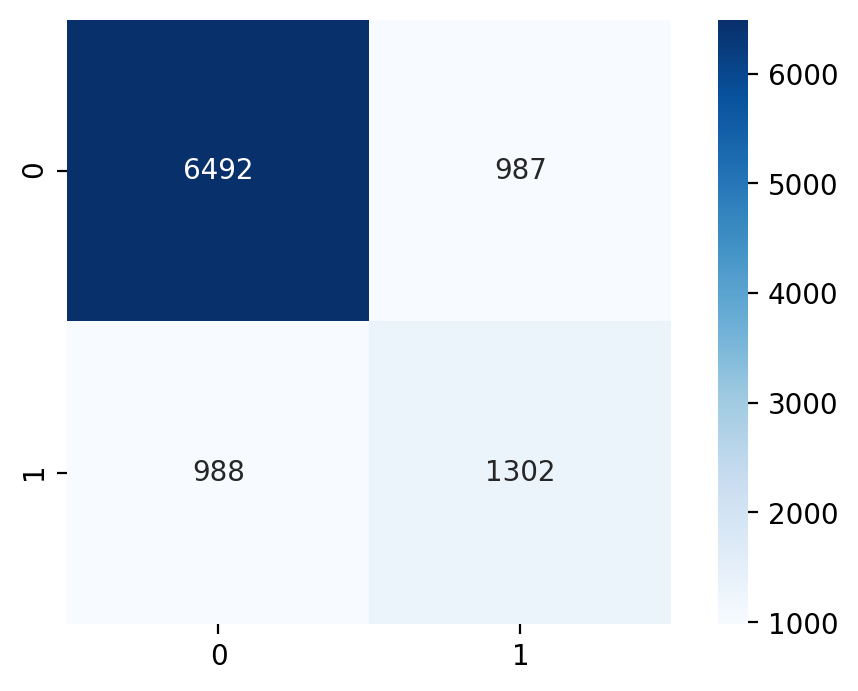

In [13]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [23]:
#acc = []
#recall = []
#precision = []
#f1 = []
n = 10

while n < 100:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train2,y_train)
    result = neigh.predict(X_test2)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 10

10
20
30
40
50
60
70
80
90


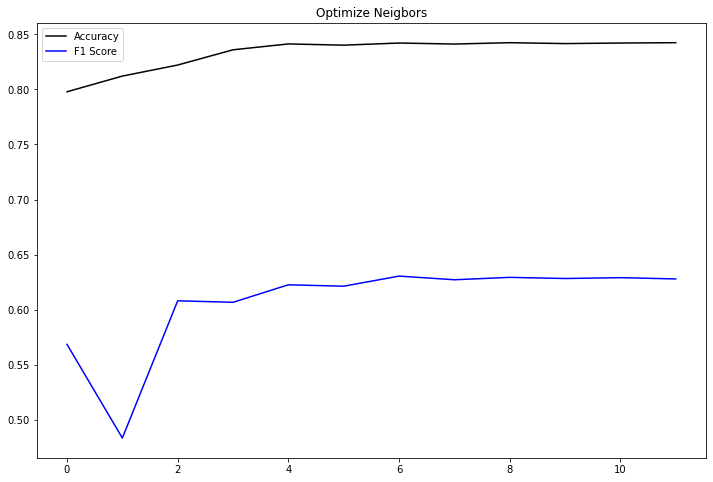

In [24]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.set_title ("Optimize Neigbors")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [25]:
print(acc)
print(precision)
print(recall)
print(f1)

[0.7978298699969291, 0.8120585525642338, 0.8220902855972976, 0.8359095096734569, 0.8412324700583478, 0.8401064592076978, 0.8420513870406388, 0.8411301054355614, 0.8423584809089979, 0.8415395639267069, 0.8420513870406388, 0.8423584809089979]
[0.5688073394495413, 0.6793048973143759, 0.6286113699906803, 0.6922216004476777, 0.7029104887424492, 0.6982570806100218, 0.6979332273449921, 0.6969050160085379, 0.7009646302250804, 0.6977611940298507, 0.6996258685195083, 0.7027027027027027]
[0.5685589519650655, 0.37554585152838427, 0.5890829694323144, 0.540174672489083, 0.5589519650655022, 0.5598253275109171, 0.5751091703056769, 0.5703056768558952, 0.5711790393013101, 0.5716157205240174, 0.5716157205240174, 0.5676855895196506]
[0.5686831185848439, 0.4836895388076489, 0.608205590622182, 0.6068187392690704, 0.6227195329603502, 0.6214251090644692, 0.6305961216183864, 0.627281460134486, 0.629451395572666, 0.628420547287566, 0.6291756789233357, 0.6280193236714975]
